In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.optimize import curve_fit
import math

In [2]:
# # Load the 2D array from the CSV file and the masks
load_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
load_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
voltages = np.loadtxt("data/voltages-4K.csv", delimiter=",")
voltage_mask = np.loadtxt("data/voltage_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
loaded_data = load_data.reshape(314,2,144)
loaded_mask = load_mask.reshape(314,2,144)

In [3]:
# add the masks to the data
clean_data = np.ma.masked_array(loaded_data, loaded_mask)
print(len(clean_data))

clean_voltages = np.ma.masked_array(voltages, voltage_mask)
print(len(clean_voltages))

314
314


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


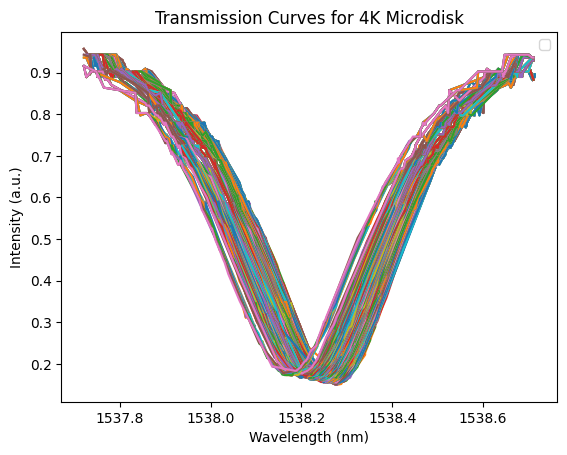

In [4]:
#lets regraph again

for i in range(len(clean_data)):
    plt.plot(clean_data[i][0], clean_data[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Curves.png")
plt.show()

In [5]:
n = 276
x = np.ma.masked_array(clean_data[n][0])
y = np.ma.masked_array(clean_data[n][1])
mini = np.argmin(y)
print(y[mini])

0.18343916442490948


In [6]:
#its beautiful
#now we fit

#function for transmission in an all pass ring

def Tsymthru(wavelength, neff, abscoef_power, r, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom

In [7]:
# #recreate a function to try and mitigate the r values taking over

# def Tsymthru(wavelength, neff, round_trip_loss_field, r, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     #round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

In [8]:
n = 276

def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power, 0.9905, 1.75e-6) #1.75 not 10
x = np.ma.masked_array(clean_data[n][0])
y = np.ma.masked_array(clean_data[n][1])
mini = np.argmin(y)
print(mini)
print(y[mini])

33
0.18343916442490948


In [9]:
print(np.argmin(y))
print(y[71])
print(x[71])

33
0.8208914159638262
1538.5039335179806


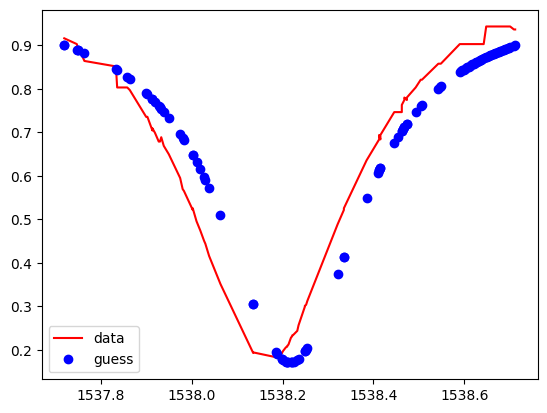

In [10]:

new_x = np.linspace(1537, 1539.5, 49)
ans = Guess(x*1e-9,2.51809461, 720)

plt.plot(x, y, 'r-', label='data')
plt.plot(x, ans, 'o', color ='blue', label ="guess")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [11]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.5178, 750]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]


In [12]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
print(fit_params_arr[12])

[  2.51801147 723.2718473 ]


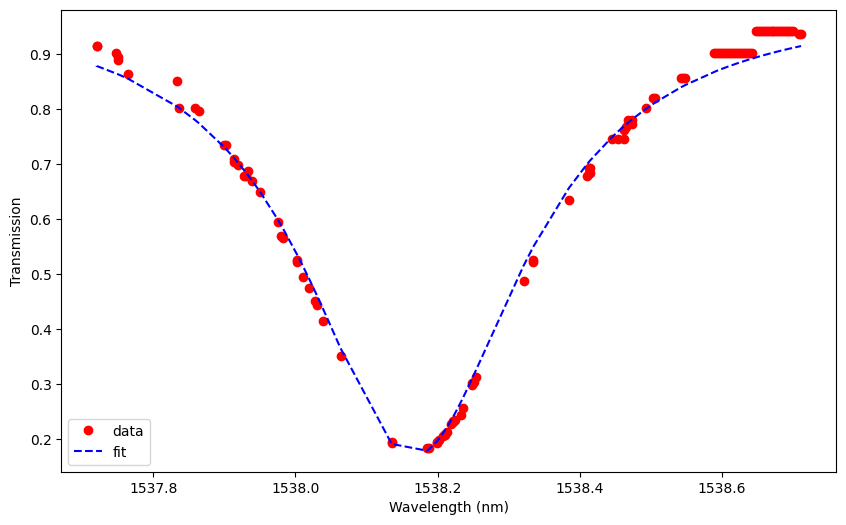

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.show()

In [14]:
length = len(clean_data)
print(clean_voltages.mask)

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False  T

In [15]:
#print(y)
print(y[~y.mask])

[0.9160195906610529 0.9160195906610529 0.9027251779484579
 0.8896237102461821 0.896150501946605 0.863988449483969 0.8514491772419137
 0.8030857221391521 0.8030857221391521 0.7972367344807172
 0.7356422544596422 0.7356422544596422 0.7040752006606457
 0.709240701673286 0.6989473207273493 0.6788065616406367
 0.6788065616406367 0.6888033300956575 0.6689548786914153
 0.6496783772269213 0.5951181211687416 0.5695810810737698
 0.565432740962823 0.5217474287334746 0.5255752682439934
 0.49572188818532853 0.47445002755086735 0.4507837519736823
 0.44424141892320096 0.415956216307186 0.3515861398113686
 0.19306977288832614 0.19448624389373734 0.18343916442490948
 0.18343916442490948 0.19306977288832614 0.19448624389373734
 0.1987983147180805 0.2061986009502232 0.2077113925966467
 0.2092352829535122 0.21231668610207866 0.22841791276812745
 0.2317818180600904 0.23348230291565356 0.2351952635070971
 0.2439504296304367 0.2567578967796601 0.29935772947205025
 0.3015539901176157 0.30376636379567834 0.312

In [16]:
# so getting there for one
# now I have a general idea of where we're going
# i just need to do it like 260 more times

fits = []

def Guess(wavelength,neff):
    return Tsymthru(wavelength, neff, 750, 0.9905, 1.75e-6)

neff = np.zeros((len(clean_voltages)))
neff_guess = 2.51819078

for n in range(0, length):
    
    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[neff_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        neff_guess = fit_params_arr[12][0]
        neff[n] = neff_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        print(len(trans))
        fits.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [2.51819078]


[2.51819554]
144
Guess is  [2.51819554]
[2.51819481]
144
Guess is  [2.51819481]
[2.51819271]
144
Guess is  [2.51819271]
[2.51819141]
144
Guess is  [2.51819141]
[2.51818989]
144
Guess is  [2.51818989]
[2.51818858]
144
Guess is  [2.51818858]
[2.5181887]
144
Guess is  [2.5181887]
[2.51818898]
144
Guess is  [2.51818898]
[2.51818872]
144
Guess is  [2.51818872]
[2.51818787]
144
Guess is  [2.51818787]
[2.51818795]
144
Guess is  [2.51818795]
[2.51818791]
144
Guess is  [2.51818791]
[2.51818788]
144
Guess is  [2.51818788]
[2.5181881]
144
Guess is  [2.5181881]
[2.51818819]
144
Guess is  [2.51818819]
[2.51818648]
144
Guess is  [2.51818648]
[2.51818645]
144
Guess is  [2.51818645]
[2.5181876]
144
Guess is  [2.5181876]
[2.51818615]
144
Guess is  [2.51818615]
[2.51818709]
144
Guess is  [2.51818709]
[2.51818376]
144
Guess is  [2.51818376]
[2.51818373]
144
Guess is  [2.51818373]
[2.51818373]
144
Guess is  [2.51818373]
[2.51818373]
144
Guess is  [2.51818373]
[2.51818376]
144
Guess is  [2.51818376]
[2.518

In [17]:
print(len(fits))

230


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


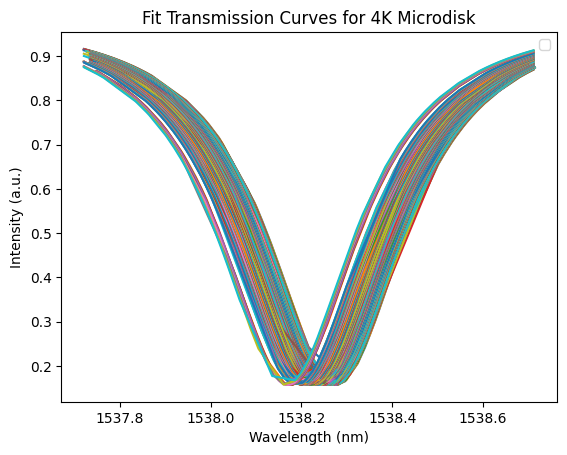

In [18]:
#so this fit looks quite good
# it could use some r variation tho so lets see if we can do that using the neff values as the set point

for i in range(len(fits)):
    plt.plot(fits[i][0], fits[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()


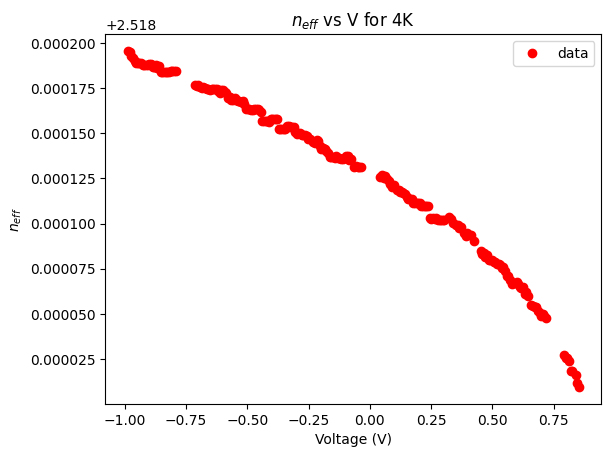

In [19]:

plt.plot(clean_voltages  , neff,  'o', color ='red', label ="data")
plt.title('$n_{eff}$ vs V for 4K')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$n_{eff}$')
#plt.savefig("Gehl-4K-Neff.png",bbox_inches='tight')
plt.legend()
plt.show()

In [20]:
# now lets try again with r

fits_r = []
j = 0

r = np.zeros((len(clean_voltages)))
r_guess = 0.99

for n in range(0, length):
    
    def Guess(wavelength,r_guess):
        return Tsymthru(wavelength, neff[n], 750, r_guess, 1.75e-6)

    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[r_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        r_guess = fit_params_arr[12][0]
        r[n] = r_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        fits_r.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [0.99]
[0.99207503]
Guess is  [0.99207503]
[0.99173084]
Guess is  [0.99173084]
[0.99161448]
Guess is  [0.99161448]
[0.99188902]
Guess is  [0.99188902]


C:\Users\madel\AppData\Local\Temp\ipykernel_214172\903224186.py:7: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength


[0.99163198]
Guess is  [0.99163198]
[0.99156481]
Guess is  [0.99156481]
[0.99167016]
Guess is  [0.99167016]
[0.99177805]
Guess is  [0.99177805]
[0.99164735]
Guess is  [0.99164735]
[0.99169717]
Guess is  [0.99169717]
[0.99165905]
Guess is  [0.99165905]
[0.99168969]
Guess is  [0.99168969]
[0.99172607]
Guess is  [0.99172607]
[0.99169057]
Guess is  [0.99169057]
[0.99168512]
Guess is  [0.99168512]
[0.99175643]
Guess is  [0.99175643]
[0.99182228]
Guess is  [0.99182228]
[0.99189333]
Guess is  [0.99189333]
[0.99180186]
Guess is  [0.99180186]
[0.99181593]
Guess is  [0.99181593]
[0.99189172]
Guess is  [0.99189172]
[0.99194108]
Guess is  [0.99194108]
[0.99194108]
Guess is  [0.99194108]
[0.99194108]
Guess is  [0.99194108]
[0.99189051]
Guess is  [0.99189051]
[0.99175537]
Guess is  [0.99175537]
[0.99173098]
Guess is  [0.99173098]
[0.99172073]
Guess is  [0.99172073]
[0.99165977]
Guess is  [0.99165977]
[0.99165977]
Guess is  [0.99165977]
[0.99182664]
Guess is  [0.99182664]
[0.99175084]
Guess is  [0.99

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


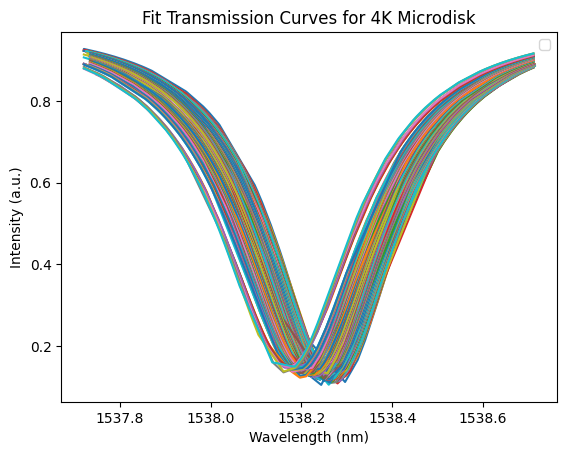

In [21]:

for i in range(len(fits_r)):
    plt.plot(fits_r[i][0], fits_r[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

In [22]:
# now lets try again with alpha

fits2 = []

alph = np.zeros((len(clean_voltages)))
alph_guess = 710

for n in range(0, length):
    
    def Guess(wavelength,alpha_coeff):
        return Tsymthru(wavelength, neff[n], alpha_coeff, 0.9905, 1.75e-6)

    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[alph_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i], bounds=((alph_guess-1,730)))
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        alph_guess = fit_params_arr[12][0]
        alph[n] = alph_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        fits2.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [710.]
[716.34091282]


C:\Users\madel\AppData\Local\Temp\ipykernel_214172\903224186.py:7: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength


Guess is  [716.34091282]
[720.04305609]
Guess is  [720.04305609]
[719.0430689]
Guess is  [719.0430689]
[718.04306912]
Guess is  [718.04306912]
[717.20014297]
Guess is  [717.20014297]
[716.20014826]
Guess is  [716.20014826]
[715.20014897]
Guess is  [715.20014897]
[714.20014991]
Guess is  [714.20014991]
[717.43442545]
Guess is  [717.43442545]
[716.43443787]
Guess is  [716.43443787]
[718.10165993]
Guess is  [718.10165993]
[717.18126045]
Guess is  [717.18126045]
[716.38891809]
Guess is  [716.38891809]
[717.92585751]
Guess is  [717.92585751]
[718.85572242]
Guess is  [718.85572242]
[717.85572327]
Guess is  [717.85572327]
[716.85572334]
Guess is  [716.85572334]
[715.85574561]
Guess is  [715.85574561]
[714.85575018]
Guess is  [714.85575018]
[714.25570543]
Guess is  [714.25570543]
[713.2557055]
Guess is  [713.2557055]
[712.25570558]
Guess is  [712.25570558]
[711.25570565]
Guess is  [711.25570565]
[710.25570577]
Guess is  [710.25570577]
[709.25570668]
Guess is  [709.25570668]
[715.59328437]
Gues

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


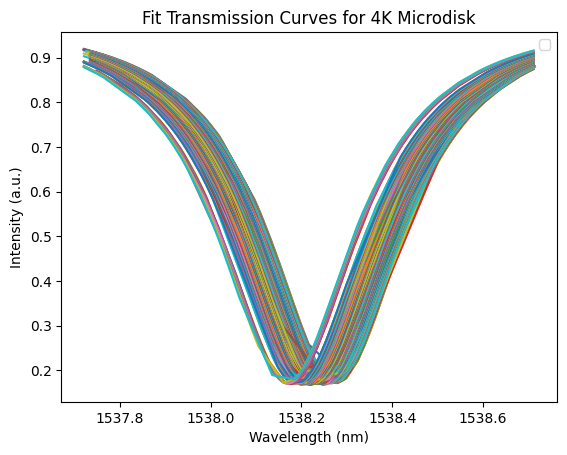

In [23]:
for i in range(len(fits2)):
    plt.plot(fits2[i][0], fits2[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

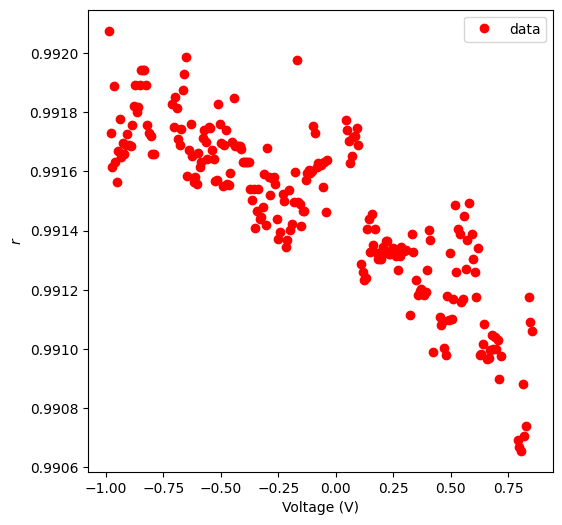

In [24]:
plt.figure(figsize=(6,6))
plt.plot(clean_voltages  , r,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$r$')

plt.legend()
plt.show()

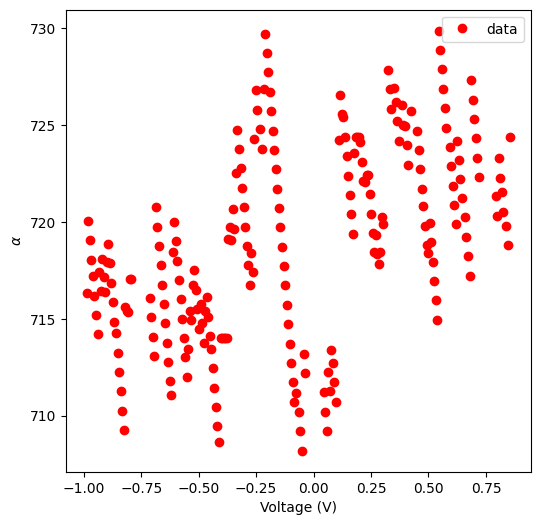

In [25]:
plt.figure(figsize=(6,6))
plt.plot(clean_voltages  , alph,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$\\alpha$')

plt.legend()
plt.show()

In [26]:
print(fits_r)

[[masked_array(data=[1537.72, 1537.72, 1537.733850415512,
                   1537.7366204986145, 1537.7393905817169,
                   1537.7421606648193, 1537.7449307479217,
                   1537.747700831024, 1537.7504709141265,
                   1537.7532409972289, 1537.7560110803313,
                   1537.7587811634337, 1537.761551246536,
                   1537.7643213296385, 1537.767091412741,
                   1537.7698614958433, 1537.7726315789457,
                   1537.7754016620481, 1537.7781717451505,
                   1537.780941828253, 1537.7837119113553,
                   1537.7864819944577, 1537.7892520775601,
                   1537.8058725761746, 1537.808642659277,
                   1537.808642659277, 1537.8197229916866,
                   1537.8197229916866, 1537.822493074789,
                   1537.8252631578914, 1537.8280332409938,
                   1537.8308033240962, 1537.8335734071986,
                   1537.836343490301, 1537.8391135734034,
      

In [27]:
# minimum_y = []
# minimum_x = []


# masked_fits = np.ma.array(fits_r)
# masked_fits = np.ma.masked_where(masked_fits == None, masked_fits) #masks all values that are 0

# print(masked_fits[~masked_fits.mask][1])

# for n in range(len(masked_fits)):
#     if clean_voltages.mask[n] == False:
#         mini_y = np.ma.argmin(masked_fits[n][1])
#         minimum_y.append(masked_fits[n][1][mini_y])
#         minimum_x.append(masked_fits[n][0][mini_y])

# plt.plot(minimum_x, minimum_y, 'o')
# plt.show()